# Project: Investigate the No-showappointments Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

#### Questions to answer: 
* What is the appointment show-up vs no show-up rate?
* How the age of the patients affects the show-up? 
* How Scholarship affects the show-up?
* How receiving SMS affects the patients show-up?
* How Gender of the patient affects his/her show-up?
* How the weekday affect the show-up?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

**Load Data and viwe some lines**

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Show some info about the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Statistics of the Data**

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Checking for duplicates**

In [5]:
df.duplicated().sum()

0

**Checking missing values (nulls)**

In [6]:
df.isnull().any().any()

False



### Data Cleaning 
* Firstly we drop the unnecessary columns (PatientId, AppointmentID).
* We rename the columns by lowering all chars and replacing "-" by "_" to make it easier to write in the code.
* There ar some negative ages, so, we clean the negative ages by replacing them with the mean of ages.
* We modify the data type of the columns (scheduledday, appointmentday) to Datetime data type to make them easier to use as Dates and times.
* after changing the data type we can find that there are few dates in the *'appointmentday'* before the *'scheduledday'*, so, we drop them. 
* We divide the DataFrame into 2 DataFrames:
    * the first one is for show appointments (df_show).
    * the second one is for no-show appointments (df_noshow).
* the column *'no_show'* is now unnecessary in both DataFrames so, we drop it.


In [7]:
#Drop unnecessary columns
df.drop(['PatientId','AppointmentID'],axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#columns names
df.rename(columns= lambda x: x.lower().replace('-','_'),inplace =True )
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [9]:
#cleaning the negative ages by replacing with the mean
mean_age = df['age'].mean()
df.loc[df['age'] <0, 'age'] = mean_age

In [10]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#DateTime columns DTypes
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] =pd.to_datetime(df['appointmentday']) 

In [12]:
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                           float64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object

In [13]:
#check wrong scheduleing
(df['scheduledday'].dt.date > df['appointmentday'].dt.date).sum()

5

In [14]:
#drop the wrong scheduleing
idxs = df[(df['scheduledday'].dt.date > df['appointmentday'].dt.date)].index
df.drop(idxs, axis = 0, inplace = True)

In [15]:
(df['scheduledday'].dt.date > df['appointmentday'].dt.date).sum()

0

In [16]:
# Make the show DataFrame
df_show = df[df['no_show'] == 'No'].copy()

#drop the no_show column
df_show.drop('no_show',axis = 1, inplace =True)
df_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0


In [17]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88208 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   gender          88208 non-null  object             
 1   scheduledday    88208 non-null  datetime64[ns, UTC]
 2   appointmentday  88208 non-null  datetime64[ns, UTC]
 3   age             88208 non-null  float64            
 4   neighbourhood   88208 non-null  object             
 5   scholarship     88208 non-null  int64              
 6   hipertension    88208 non-null  int64              
 7   diabetes        88208 non-null  int64              
 8   alcoholism      88208 non-null  int64              
 9   handcap         88208 non-null  int64              
 10  sms_received    88208 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(6), object(2)
memory usage: 8.1+ MB


In [18]:
# Make the no_show DataFrame
df_noshow = df[df['no_show'] == 'Yes'].copy()

#drop the no_show column
df_noshow.drop('no_show',axis = 1, inplace =True)
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29.0,NOVA PALESTINA,0,0,0,0,0,1
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40.0,CONQUISTA,1,0,0,0,0,0
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30.0,NOVA PALESTINA,0,0,0,0,0,0


In [19]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22314 entries, 6 to 110516
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   gender          22314 non-null  object             
 1   scheduledday    22314 non-null  datetime64[ns, UTC]
 2   appointmentday  22314 non-null  datetime64[ns, UTC]
 3   age             22314 non-null  float64            
 4   neighbourhood   22314 non-null  object             
 5   scholarship     22314 non-null  int64              
 6   hipertension    22314 non-null  int64              
 7   diabetes        22314 non-null  int64              
 8   alcoholism      22314 non-null  int64              
 9   handcap         22314 non-null  int64              
 10  sms_received    22314 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(6), object(2)
memory usage: 2.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### General EDA

In [20]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


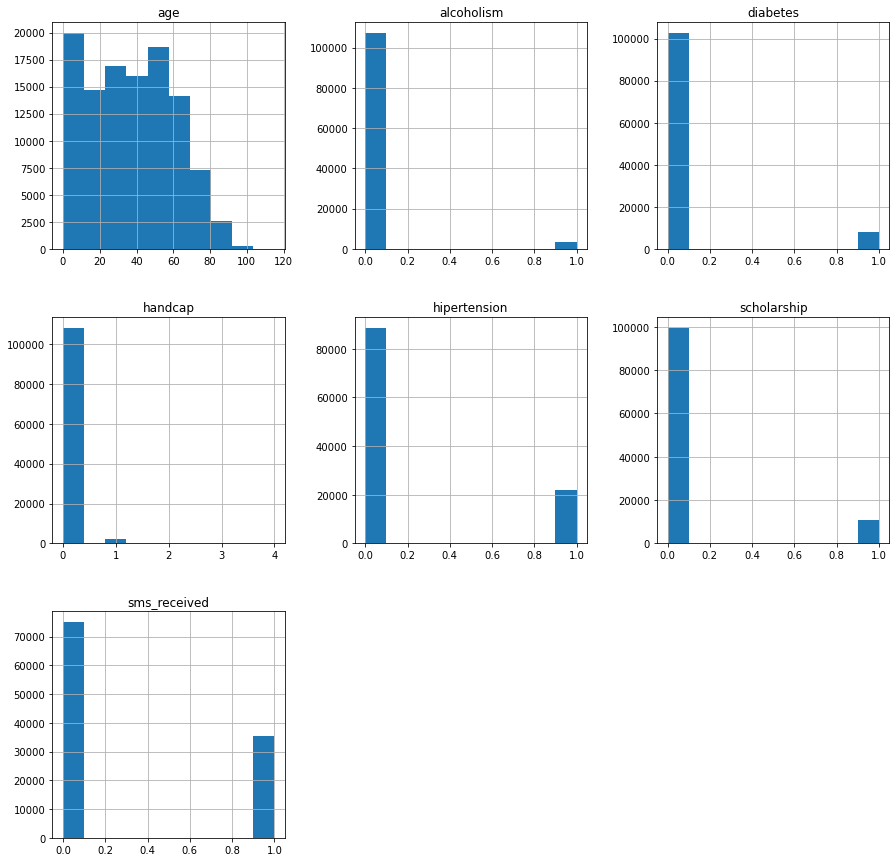

In [48]:
df.hist(figsize= (15,15));

We notice that there is sparsity in many variables.
***

#### df_show EDA

In [22]:
df_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,37.790496,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
std,23.338513,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


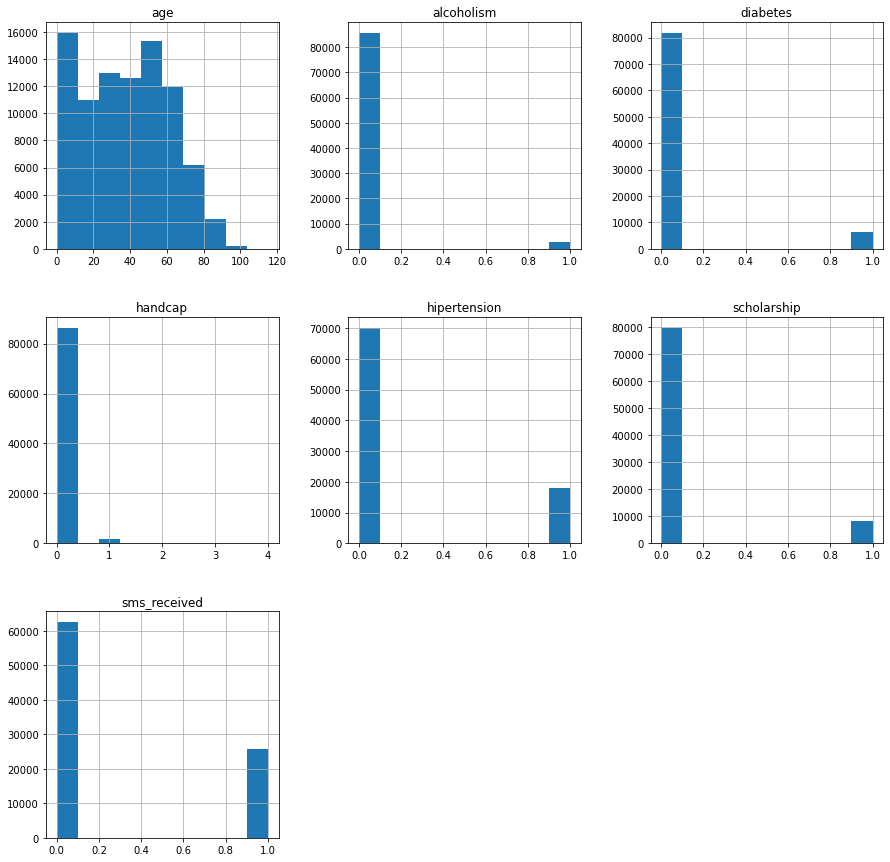

In [43]:
df_show.hist(figsize = (15,15));

#### df_noshow EDA

In [44]:
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29.0,NOVA PALESTINA,0,0,0,0,0,1
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40.0,CONQUISTA,1,0,0,0,0,0
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30.0,NOVA PALESTINA,0,0,0,0,0,0


In [45]:
df_noshow.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000
mean,34.317872,0.115533,0.169042,0.064085,0.030340,0.020212,0.438469
std,21.965009,0.319671,0.374797,0.244910,0.171524,0.156412,0.496211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


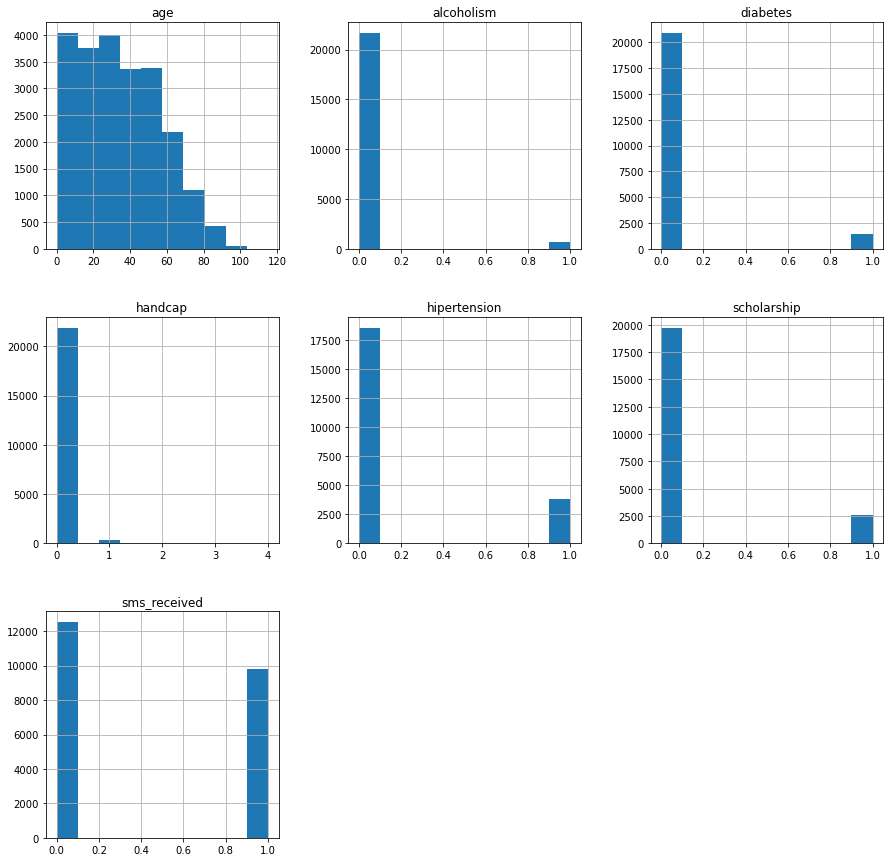

In [47]:
df_noshow.hist(figsize = (15,15));

### Research Question 1: What is the appointment show-up vs no show-up rate?

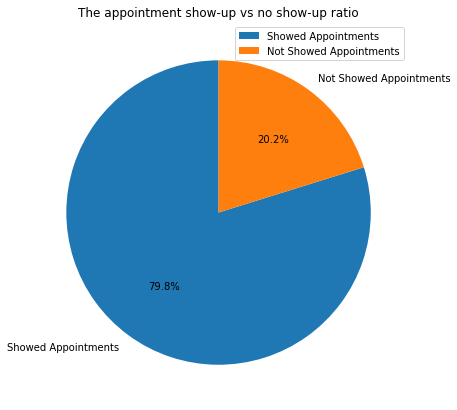

In [27]:
plt.figure(figsize =(7,7))
plt.pie([len(df_show),len(df_noshow)],labels =['Showed Appointments','Not Showed Appointments'],autopct='%1.1f%%',startangle=90)
plt.title('The appointment show-up vs no show-up ratio')
plt.legend();

about 80% of total patiens show up in their appointments 

let's explor more variabels.
***

### Research Question 2: How the age of the patients affects the show-up?

In [28]:
df_show['age'].mean()

37.79049620073249

In [29]:
df_noshow['age'].mean()

34.31787218786412

We notice that the mean age of show-up patients is higher.


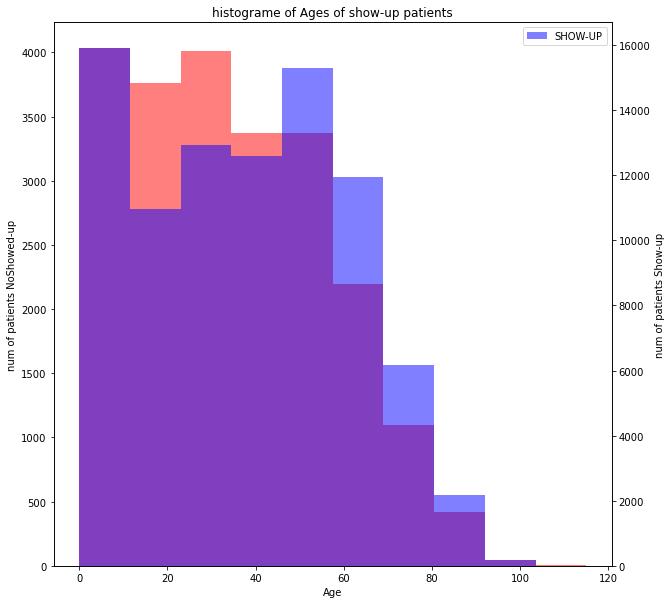

In [30]:
#plotting Histograms of patients ages (show-up, no show-up)

plt.figure(figsize =(10,10))
#hist of Ages of show-up patients 
plt.hist(df_noshow['age'],color ='r',alpha = 0.5)
plt.ylabel('num of patients NoShowed-up')
plt.xlabel('Age')

#hist of Ages of no show-up patients
plt.twinx()
plt.hist(df_show['age'],color ='b',alpha =0.5,label ='SHOW-UP')
plt.title('histograme of Ages of show-up patients')
plt.ylabel('num of patients Show-up')
plt.legend();


Generally the ages the patients who show up their appointment is greater than who didn't.
***

### Research Question 3: How Scholarship affects the show-up?

In [31]:
scholarship_show = df_show['scholarship'].sum() #number of patients had a scholarship and show up in their appointment
scholarship_noshow = df_noshow['scholarship'].sum() #number of patients had a scholarship and did not show up in their appointment

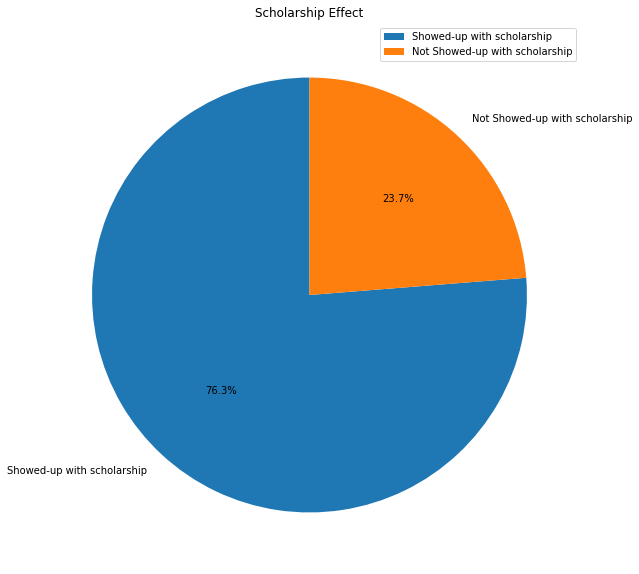

In [32]:
#pie chart for Showed-up with scholarship, and Not Showed-up with scholarship patients
plt.figure(figsize =(10,10))
plt.pie([scholarship_show,scholarship_noshow],labels =['Showed-up with scholarship','Not Showed-up with scholarship'],autopct='%1.1f%%',startangle=90)
plt.title('Scholarship Effect')
plt.legend();

We notice that about 76% who has a scholarship did show up the appointment!
***

### Research Question 4: How receiving SMS affects the patients show-up?

In [33]:
sms_show = df_show['sms_received'].sum() # number of patients who receives one or more SMS and show up
sms_noshow = df_noshow['sms_received'].sum() # number of patients who receives one or more SMS and did not show up

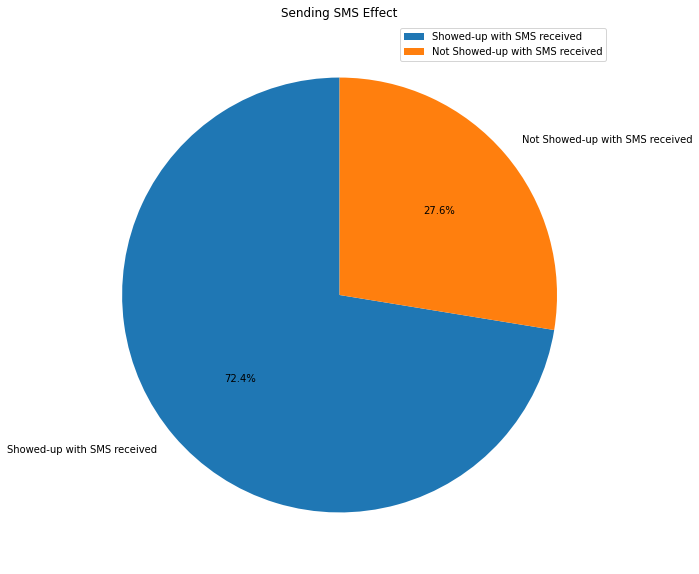

In [34]:
# pie chart for Showed-up with SMS received, and Not Showed-up with SMS received patients
plt.figure(figsize =(10,10))
plt.pie([sms_show,sms_noshow],labels =['Showed-up with SMS received','Not Showed-up with SMS received'],autopct='%1.1f%%',startangle=90)
plt.title('Sending SMS Effect')
plt.legend();

Note that about 72% who have received one SMS or more did show up.
***

### Research Question 5: How Gender of the patient affects his/her show-up?

In [35]:
#value counts of all patients gender
gender = df['gender'].value_counts()
gender

F    71837
M    38685
Name: gender, dtype: int64

In [36]:
#value counts of show-up patients
gender_show = df_show['gender'].value_counts()
gender_show

F    57246
M    30962
Name: gender, dtype: int64

In [37]:
#value counts of no show-up patients
gender_noshow = df_noshow['gender'].value_counts()
gender_noshow

F    14591
M     7723
Name: gender, dtype: int64

In [38]:
#percentages of Males 
M_percentage_show =  gender_show.loc['M']/gender.loc['M']  #show-up males
M_percentage_noshow = gender_noshow.loc['M']/gender.loc['M']  #no show-up males

#percentages of Females
F_percentage_show =  gender_show.loc['F']/gender.loc['F'] #show-up females
F_percentage_noshow = gender_noshow.loc['F']/gender.loc['F'] #no show-up females

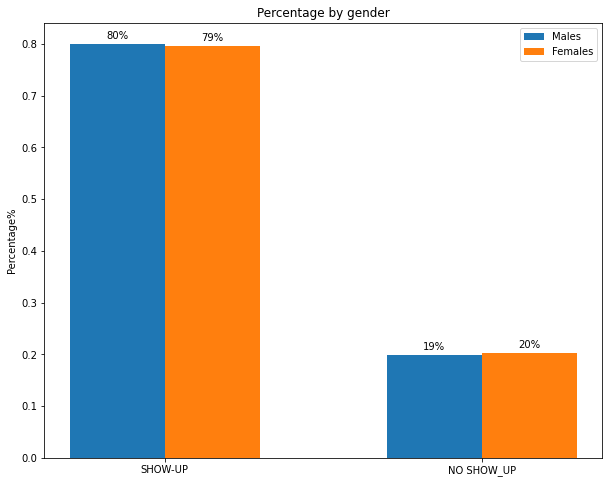

In [39]:
#Group bar plot for gender feature

labels = ['SHOW-UP','NO SHOW_UP']
M = [M_percentage_show,M_percentage_noshow]
F = [F_percentage_show,F_percentage_noshow]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, M, width, label='Males')
rects2 = ax.bar(x + width/2, F, width, label='Females')

ax.set_ylabel('Percentage%')
ax.set_title('Percentage by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    #Attach a percentage above each bar in rects
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(int(height*100)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()


A nearly equal percentage of males and females that show or don’t show up the appointment.
***

### Research Question 6: How the weekday affect the show-up?

In [40]:
df_show['appointmentday'].dt.day_name().value_counts()

Wednesday    20774
Tuesday      20488
Monday       18025
Friday       14982
Thursday     13909
Saturday        30
Name: appointmentday, dtype: int64

##### There is one weekday has no records.

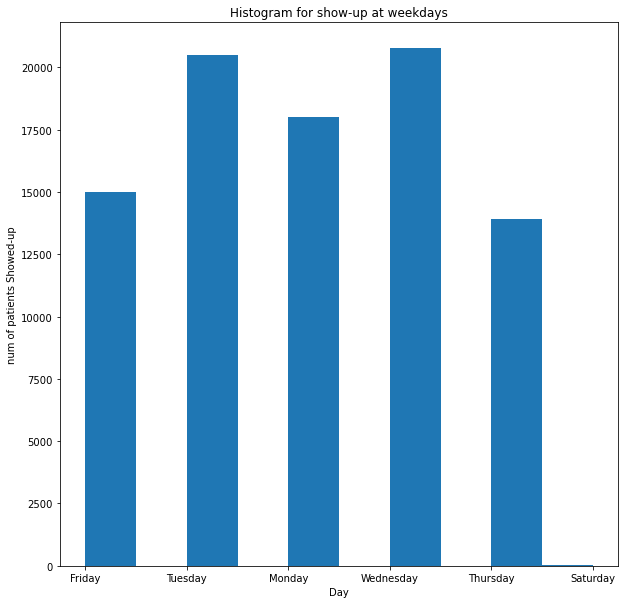

In [41]:
#histogram for months of appointment
plt.figure(figsize =(10,10))
#hist of Ages of show-up patients 
plt.hist( df_show['appointmentday'].dt.day_name())
plt.ylabel('num of patients Showed-up')
plt.xlabel('Day')
plt.title('Histogram for show-up at weekdays');

The graph shows us the number of patients who show up each weekday, maybe it’s better to plot as a percentage pie chart.
***

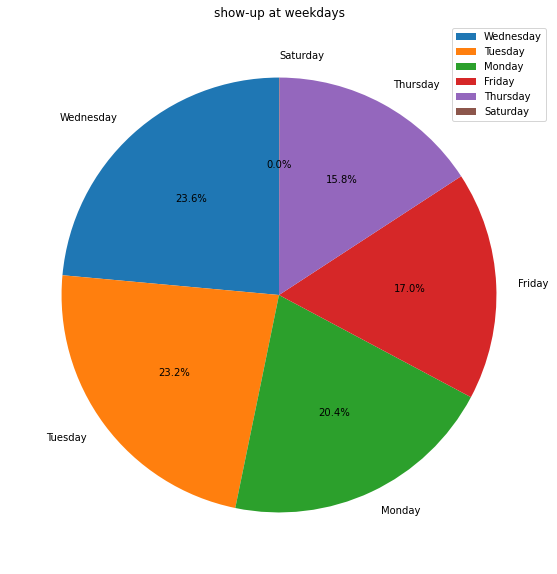

In [42]:
plt.figure(figsize =(10,10))
labels = df_show['appointmentday'].dt.day_name().value_counts().index
plt.pie(df_show['appointmentday'].dt.day_name().value_counts(), labels = labels ,autopct='%1.1f%%',startangle=90)
plt.title('show-up at weekdays')
plt.legend();

Now it is relatively  clearer.
 ***
 ***


<a id='conclusions'></a>
## Conclusions

> **the appointment show-up vs no show-up rate**: <br /> about 80% of total patiens show up in their appointments.

> **How the age of the patients affects the show-up?** <br />
We notice that generally the ages the patients who show up their appointment is greater than who didn't. <br />
And we can also notice this in the means of ages, the mean age for patients who show up = 37.8, and for who did not = 34.3 years. <br />

> **Scholarship effect** <br /> 
The % Percentage of the patients who have a scholarship and show up is 76.3%.

> **SMS effect** <br />
The % Percentage of the patients who received one or more SMS  and show up is 72.4%.

> **Gender effect**<br />
The meals of femeals who show up is about 80% and this percentage is close to the overall rate.

> **weekday affect** <br />
We can notice that the day Wednsday has the most showing-up in the days of week. <br />
The Day Saturday has very low showing-up.<br />
The Day Sunday has zero records, So, may be they don't receive patiens that day.